# How to compute a correspondence with functional maps

This is the first demo on how to use geomfum to compute a correspondence with functional maps.  
In this notebook we will see what does it mean to compute a functional map and what are the main steps to do so.  
Lets Start!

# Importing and visualizing shapes

First of all, we need to import our data, we will start from a pair of shapes from the TOSCA dataset (https://paperswithcode.com/dataset/tosca)

In [1]:
import geomstats.backend as gs

from geomfum.dataset import NotebooksDataset
from geomfum.plot import MeshPlotter
from geomfum.shape import Graph
from geomfum.laplacian import GraphLaplacianFinder


dataset = NotebooksDataset()

mesh_a = Graph.from_file('../../data/cornell_edges.csv')
mesh_b = Graph.from_file('../../data/texas_edges.csv')


c:\Users\mep\Desktop\geomfum\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Compute Basis
Now that we have our pair of shapes, we can compute their basis.  
The basis of a shape is a set of functions that represent a basis for the space of squared integrable function defined on the surface of the shape.  
There are different kind of basis, but usually we consider the eigenfunctions of the Laplace beltrami operator.

In [2]:
k = 50  # we select the number of basis that we want to compute
mesh_a.laplacian.find(laplacian_finder=GraphLaplacianFinder())
mesh_b.laplacian.find(laplacian_finder=GraphLaplacianFinder())


(<Compressed Sparse Row sparse array of dtype 'int64'
 	with 741 stored elements and shape (183, 183)>,
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], shape=(183, 183)))

In [3]:
k = 50  # we select the number of basis that we want to compute
mesh_a.laplacian.find_spectrum(spectrum_size=k, set_as_basis=True)
mesh_b.laplacian.find_spectrum(spectrum_size=k, set_as_basis=True)


C:\Users\mep\Desktop\geomfum\geomfum\numerics\eig.py:19: UserWarning: M does not have the same type precision as A. This may adversely affect ARPACK convergence
  vals, vecs = scipy.sparse.linalg.eigsh(


(array([-3.26128013e-16,  1.11056994e-01,  2.13106383e-01,  2.37791486e-01,
         2.70339360e-01,  3.04618050e-01,  3.29162108e-01,  3.64251110e-01,
         3.78388605e-01,  3.81966011e-01,  3.81966011e-01,  4.07469090e-01,
         4.38699490e-01,  4.61762731e-01,  4.76349777e-01,  4.93643674e-01,
         5.20515566e-01,  5.40154167e-01,  5.41571514e-01,  5.59834928e-01,
         5.64614368e-01,  5.77083185e-01,  5.85786438e-01,  5.97164291e-01,
         6.60316708e-01,  7.08721380e-01,  7.24225462e-01,  7.42717549e-01,
         7.82994214e-01,  7.86816464e-01,  8.17522225e-01,  8.60005160e-01,
         8.75226688e-01,  8.89509486e-01,  9.05287330e-01,  9.13012490e-01,
         9.28109027e-01,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]),
 array([[ 7.39221271e-02, -2.70962264e-02, -

Here we display two eigenfunctions on the shape.

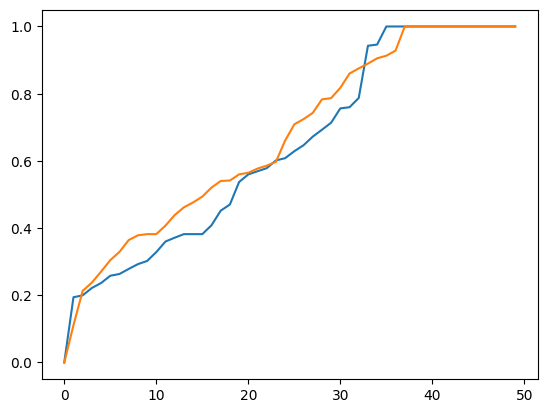

In [10]:
import matplotlib.pyplot as plt 

plt.plot(mesh_a.basis.vals)
plt.plot(mesh_b.basis.vals)

In [19]:
import networkx as nx

In [29]:
mesh_a.basis.vecs[:, 1]

array([ 3.11147082e-02,  2.78269272e-02,  2.83612951e-02,  5.54435194e-03,
        8.30206231e-03,  2.62051462e-02,  2.36814750e-02,  2.36408579e-02,
        2.72264220e-02,  2.41953778e-02,  2.32358385e-02,  2.59364457e-02,
        1.88378114e-02,  2.05706419e-02,  2.51653800e-02,  2.02793003e-02,
       -1.38352873e-01, -7.39383982e-02, -1.71687513e-01, -7.59010015e-02,
       -1.71687513e-01,  1.40568126e-02,  1.13275588e-02,  2.10528271e-02,
        1.70469570e-02,  1.16977809e-02,  1.47253748e-02,  9.26304048e-05,
        7.46453974e-05,  2.47244718e-02,  2.02924930e-02,  1.71660692e-02,
        1.72972834e-02,  2.16816584e-02,  3.37860019e-03, -2.26879616e-01,
       -4.01626547e-01, -1.20173983e-01,  1.33752299e-02, -6.11069315e-03,
        1.09501266e-02,  1.37612924e-02,  1.65978480e-02,  2.36770826e-02,
        2.37954398e-02,  1.92893109e-02,  8.14081671e-03,  7.60880708e-03,
        1.13275588e-02,  1.40568126e-02,  1.49346475e-02,  1.13275588e-02,
        1.40568126e-02,  

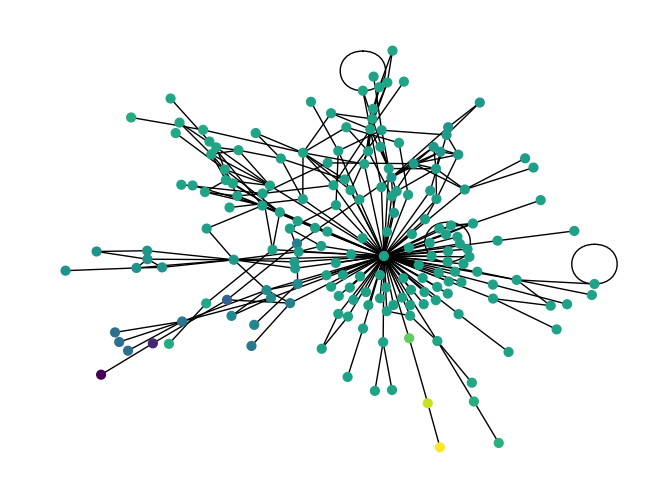

In [42]:
nx.draw(mesh_a.graph, node_color=mesh_a.basis.vecs[:, 1], node_size=40, )

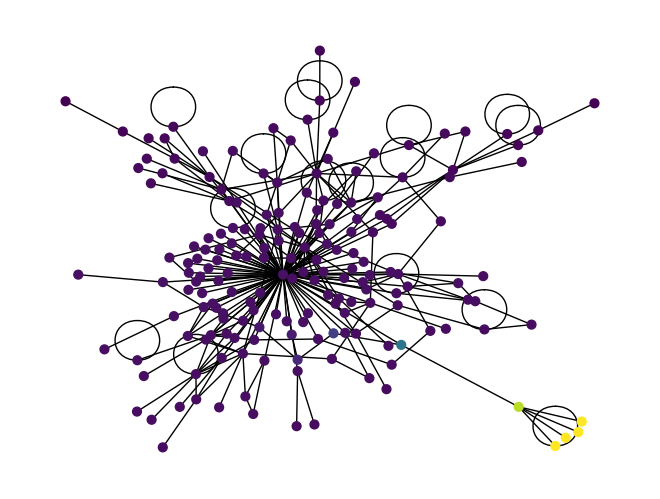

In [43]:
nx.draw(mesh_b.graph, node_color=mesh_b.basis.vecs[:, 1], node_size=40, )

In [ ]:
56, 84, 127, 171, 57

In [ ]:
57, 176, 5, 99, 24

In [65]:
# Compute eigenvector centrality
centrality = nx.eigenvector_centrality_numpy(mesh_a.graph)

# Convert to sorted list of tuples (node, centrality), descending order
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
sorted_centrality

[(57, 0.6857294618533323),
 (176, 0.11028404342836423),
 (5, 0.10681621633947488),
 (99, 0.09360118685135273),
 (24, 0.09082806219530605),
 (158, 0.08926003260460831),
 (153, 0.08915582491826944),
 (155, 0.08579123999748141),
 (168, 0.0857912399974814),
 (43, 0.08327887903516919),
 (154, 0.0823716122916176),
 (53, 0.08038010941004887),
 (135, 0.08028070022181151),
 (164, 0.08019760023187338),
 (3, 0.07947766304726579),
 (147, 0.07946654626423212),
 (84, 0.07923934988507877),
 (160, 0.07920601504384517),
 (30, 0.07914204573854308),
 (46, 0.07893799309055377),
 (145, 0.07893799309055377),
 (96, 0.0786122769199765),
 (104, 0.07779770894083411),
 (41, 0.07766146149608177),
 (105, 0.0772836100826414),
 (77, 0.07717223303339235),
 (175, 0.07717223303339235),
 (68, 0.07700860859901607),
 (31, 0.07685311235658422),
 (109, 0.07660559511311539),
 (95, 0.07625998139083404),
 (42, 0.075954421292581),
 (18, 0.07579721008974277),
 (128, 0.07548731842252435),
 (165, 0.07545499901751597),
 (174, 0.075

# Compute Descriptors
Another set of functions that are useful in functional maps are the descriptors.  
While the basis describes the function space, the descriptors are functions that describe the shapes, including geometric and semantic inforations that are shared by the shapes. 

In [11]:
from geomfum.descriptor.pipeline import (
    ArangeSubsampler,
    DescriptorPipeline,
    L2InnerNormalizer,
)
from geomfum.descriptor.spectral import WaveKernelSignature


**Landmarks**  
Often, the information provided by descriptors alone is not sufficient to compute an accurate functional map.  
For this reason, a good thing is to provide some points that we know are in correspondence, these are called landmarks.
We can select the landmarks plotting the shapes.

In [ ]:
mesh_a.landmark_indices = gs.array([57, 176, 5, 99, 24])
mesh_b.landmark_indices = gs.array([56, 84, 127, 171, 57])

In [74]:
steps = [
    WaveKernelSignature.from_registry(n_domain=50, use_landmarks=True),
]

pipeline = DescriptorPipeline(steps)

descr_a = pipeline.apply(mesh_a)
descr_b = pipeline.apply(mesh_b)

# Optimize Functional Map
Now, we have all the elements to optimize our first functional maps.

In [75]:
from geomfum.functional_map import (
    FactorSum,
    LBCommutativityEnforcing,
    OperatorCommutativityEnforcing,
    SpectralDescriptorPreservation,
)
from geomfum.numerics.optimization import ScipyMinimize


We select the numbr of eigenfunctions we want to use.

In [76]:
mesh_a.basis.use_k = 10
mesh_b.basis.use_k = 10

The optimization of the functional map can be performed considering different constraints, for example:
1) SpectralDescriptorPreservation: the functional map needs to align spectral coefficients of descriptors.
2) LBCommutativityEnforcing: the functional map needs to commute with the Laplace Beltrami operator.
3) OperatorCommutativityEnforcing: the functional map needs to commute with a chosen operator defined on meshes.

Details about these energies can be found in https://dl.acm.org/doi/10.1145/3084873.3084877.

In [77]:
factors = [
    SpectralDescriptorPreservation(
        mesh_a.basis.project(descr_a),
        mesh_b.basis.project(descr_b),
        weight=1.0,
    ),
    LBCommutativityEnforcing.from_bases(
        mesh_a.basis,
        mesh_b.basis,
        weight=1e-2,
    ),

]

Once we have instantiated the constraints with respective weights we can optimize the map.

In [78]:
objective = FactorSum(factors)

optimizer = ScipyMinimize(
    method="L-BFGS-B",
)

x0 = gs.zeros((mesh_b.basis.spectrum_size, mesh_a.basis.spectrum_size))

res = optimizer.minimize(
    objective,
    x0,
    fun_jac=objective.gradient,
)

fmap = res.x.reshape(x0.shape)


We show the obtained functional maps.

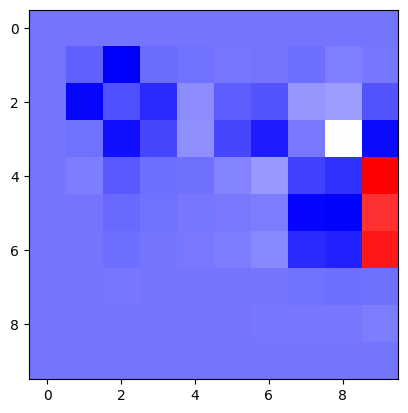

In [79]:
import matplotlib.pyplot as plt

plt.imshow(fmap, cmap="bwr")

# Get the correspondence
Once we have the functional map, we can compute the point-to-point correspondence performing a nearest search in the space of function.

In [15]:
from geomfum.convert import P2pFromFmConverter

p2p_converter = P2pFromFmConverter()

p2p = p2p_converter(fmap, mesh_a.basis, mesh_b.basis)

We can visualize the quality of the mapping on the shapes by transfering a vertex scalar.

In [16]:
scalar_a = gs.mean(mesh_a.vertices, axis=-1)

plotter_a.set_vertex_scalars(scalar_a)
plotter_a.show()

plotter_b.add_mesh(mesh_b)
plotter_b.set_vertex_scalars(scalar_a[p2p])
plotter_b.show()


# Refining the correspondence
A lot of time, a small number of basis is not enough to have a good correspondence, for this reason a lot of methods are based on a 'refinement' stage.

In [17]:
from geomfum.refine import ZoomOut

In [18]:
zoomout = ZoomOut(nit=6, step=5)

zoomout_fmap_matrix_ = zoomout(fmap, mesh_a.basis, mesh_b.basis)
p2p_ref = p2p_converter(zoomout_fmap_matrix_, mesh_a.basis, mesh_b.basis)

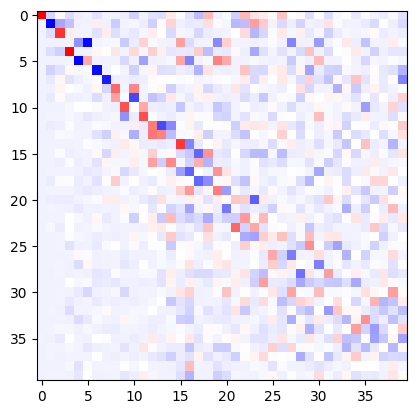

In [19]:
plt.imshow(zoomout_fmap_matrix_, cmap="bwr")

In [20]:
scalar_a = gs.mean(mesh_a.vertices, axis=-1)

plotter_a.set_vertex_scalars(scalar_a)
plotter_a.show()

plotter_b.add_mesh(mesh_b)
plotter_b.set_vertex_scalars(scalar_a[p2p_ref])
plotter_b.show()
